# Linear Models
**Adapted from Hands-On Machine Learning with Scikit-Learn and TensorFlow by Aurélien Géron**

https://github.com/ageron/handson-ml

- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# to make this notebook's output stable across runs
np.random.seed(42)

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

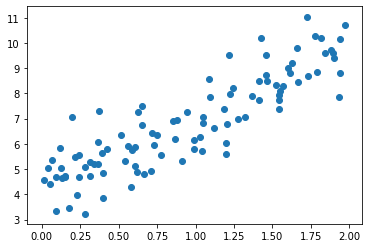

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [3]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Plot the model's predictions:

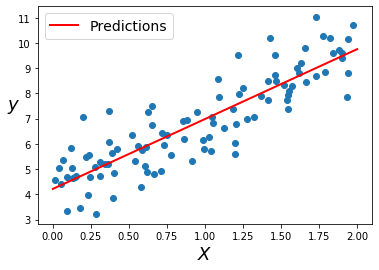

In [4]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [5]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [6]:
X_new.shape

(2, 1)

In [7]:
y_new = linear_reg.predict(X_new)
y_new

array([[4.21509616],
       [9.75532293]])

In [8]:
linear_reg.intercept_, linear_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

The model estimates:

$\hat{y} = 3.05X + 4.05$

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [9]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

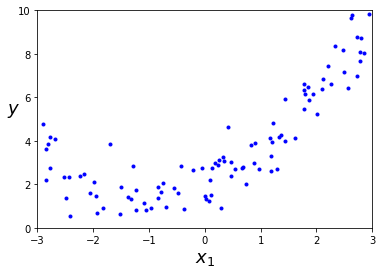

In [10]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [12]:
X[0]

array([1.76886782])

`X_poly` now contains the original feature of X plus the square of the feature:

In [13]:
X_poly[0]

array([1.76886782, 3.12889337])

Fit the model to this extended training data:

In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04630034, 0.5015459 ]]), array([1.99958228]))

The model estimates:

$\hat{y} = 0.50X^2 + 1.04X + 1.99$

Plot the data and the predictions:

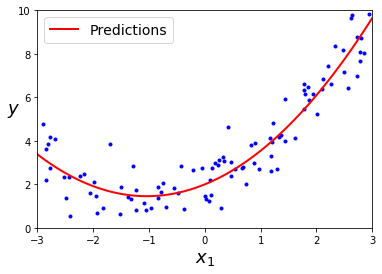

In [15]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

The model gives good estimations.

## Regularization

- A way to reduce overfitting is to regularize the model (e.g. constrain it), having less degrees of freedom.

- For example in a polynomial model: reduce the number of polynomial degrees.

- Regularization of a linear model is usually achieved by constraining the weights of the model. 

### Ridge Regression or L<sub>2</sub> Regularization 

- A regularization term is added to the cost function (MSE).
- It forces the learning algorithm to fit the data and keep the model weights as small as possible.
- The regularization term should only be added to the cost function during training.
- Once the model is trained: evaluate the model’s performance using the unregularized performance measure.

It penalizes the sum of squares (2-norms) of the model coefficients.

$J(\Theta)= MSE(\Theta) + \alpha\frac{1}{2}\sum_{i=1}^{n}\Theta^²$

$\alpha$ is a free parameter that controls the strength of the penalty, how much you want to regularize the model.

In the limit $\alpha \to 0$, we recover the standard linear regression result.

In the limit $\alpha \to \infty$, all model responses will be suppressed. 

Generate new data:

In [16]:
X = np.array([i*np.pi/180 for i in range(60,300,4)])
y = np.sin(X) + np.random.normal(0, 0.15, len(X))

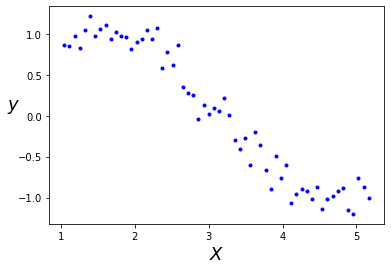

In [17]:
plt.plot(X, y, "b.")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18);

In [18]:
X.shape, y.shape

((60,), (60,))

In [19]:
X = X.reshape(-1, 1)

In [20]:
X.shape

(60, 1)

It is important to **scale** the data before performing Ridge Regression:

In [21]:
from sklearn.preprocessing import StandardScaler

poly_features = PolynomialFeatures(degree=15, include_bias=False)
X_poly = poly_features.fit_transform(X)
scaler = StandardScaler() 
X_poly_scaled = scaler.fit(X_poly) 

In [22]:
# better 
from sklearn.pipeline import Pipeline

model = Pipeline([("poly_features", PolynomialFeatures(degree=15, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("linear_reg", LinearRegression())])
model.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=15, include_bias=False,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

Make predictions with the model without regularization:

In [23]:
y_pred = model.predict(X)

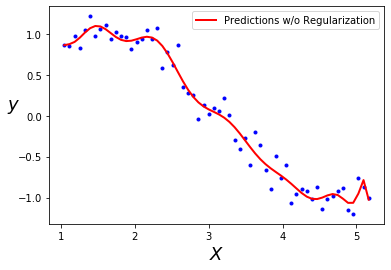

In [24]:
plt.plot(X, y, "b.")
plt.plot(X, y_pred, "r-", linewidth=2, label="Predictions w/o Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10);

The model is clearly overfitting.

Add Ridge Regularization to the model:

In [25]:
from sklearn.linear_model import Ridge

model_ridge = Pipeline([("poly_features", PolynomialFeatures(degree=15, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("ridge", Ridge(alpha = 5, solver = 'cholesky', random_state = 42))])
model_ridge.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=15, include_bias=False,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None,
                       normalize=False, random_state=42, solver='cholesky',
                       tol=0.001))],
         verbose=False)

In [26]:
y_pred = model_ridge.predict(X)

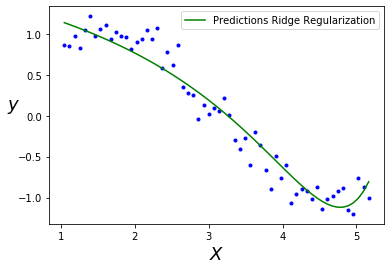

In [27]:
plt.plot(X, y, "b.")
plt.plot(X, y_pred, "g-",label="Predictions Ridge Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10);

The model with Ridge Regularization shows less overfitting.

## Exercise

Try with alpha = 1e-10, 0.001, 1

### Lasso Regression  or L<sub>1</sub> Regularization 

- It uses the l1 norm of the weight vector.
- It penalizes the sum of absolute values (1-norms) of regression coefficients.
- The hyperparameter α controls how much you want to regularize the model:

It penalizes the sum of absolute values (1-norms) of regression coefficients.

$J(\Theta)= MSE(\Theta) + \alpha\sum_{i=1}^{n}|\Theta_i|$

$\alpha$ is a free parameter that controls the strength of the penalty, how much you want to regularize the model.

In the limit $\alpha \to 0$, we recover the standard linear regression result.

In the limit $\alpha \to \infty$, all weights are closed to zero, a flat line going through the data's mean.

Lasso tends to eliminate the weights of the least important features (sets them to zero): automatically performs feature selection and outputs a model with few non-zero feature weights.

It is important to **scale** the data before performing Lasso Regression:

In [28]:
from sklearn.linear_model import Lasso

model_lasso = Pipeline([("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                        ("scaler", StandardScaler()),
                        ("lasso", Lasso(alpha = 0.001, random_state = 42))])
model_lasso.fit(X, y)

/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0237310116158731, tolerance: 0.003946191860959529
  positive)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=10, include_bias=False,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lasso',
                 Lasso(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=42, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [29]:
y_pred = model_lasso.predict(X)

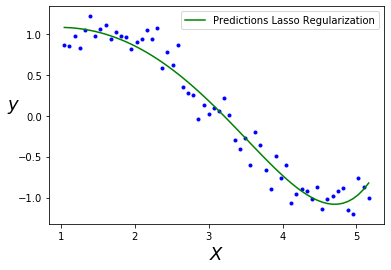

In [30]:
plt.plot(X, y, "b.")
plt.plot(X, y_pred, "g-",label="Predictions Lasso Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10);

Here Lasso Regularization also prevents overfitting.

## Exercise

Try with alpha = 1e-10, 0.001, 1

## Logistic Regression  

- Some regression algorithms can be used for classification as well.
- **Logistic Regression** estimates the probability that an instance belongs to a particular class (e.g. what is the probability that an email is spam?).
- If the probability is grater that 50% the model predicts the instance belongs to that class (positive class, labeled ‘1’), or else it predicts that not (negative class, labeled ‘0’).
- Computes a weight sum of the input features plus a bias term but instead of outputting the result directly like the Linear Regression does, it outputs the logistic of this result.
- It uses a logistic function to model a binary dependent variable.

Use the Iris dataset to illustrate **Logistic Regression** and build a classifier to detect *Iris virginica* based only on petal width feature:

In [31]:
from sklearn import datasets

iris = datasets.load_iris()

In [32]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [33]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [34]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [35]:
X = iris['data'][:, 3:] # petal width
y = (iris['target'] == 2).astype(np.int) # 1 if Iris virginica, else 0

In [36]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Train a Logistic Regression model:

In [37]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C= 1.0, penalty='l2', random_state = 42)
log_reg.fit(X, y)

/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Look at the model's estimated probabilities for flowers with petal widths from 0 to 3 cm:

In [38]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
y_proba

array([[0.98554411, 0.01445589],
       [0.98543168, 0.01456832],
       [0.98531838, 0.01468162],
       ...,
       [0.02618938, 0.97381062],
       [0.02598963, 0.97401037],
       [0.02579136, 0.97420864]])

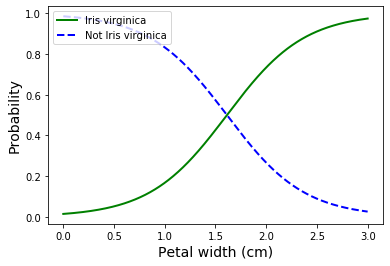

In [39]:
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper left", fontsize=10);

Above 2 cm petal width the classifier is confident that the flower is *Iris virginica* and below 1 cm that it is not. In between the classifire is unsure.

There is a decision boundary around 1.6 cm where both probabilities are arond 50%.

Let's see the predictions for 1.5 cm and 1.7 cm:

In [40]:
log_reg.predict([[1.5], [1.7]])

array([0, 1])

### Softmax Regression or Multinomial Logistic Regression

- Logistic Regression can be generalized to support multiple classes directly.
- It computes a score for each class and the estimates the probability of each class by applying the softmax 

In [41]:
X = iris['data'][:, (2, 3)] # petal length, petal width
y = iris['target']

softmax_reg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C=10, random_state = 42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
softmax_reg.predict([[5, 2]])

array([2])

In [43]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

## Extras

### High Degree Polynomial Regression

A high-degree Polynomial Regression will likely fit the training data much better than with Linear Regression.

Generate some data:

In [44]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [45]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)

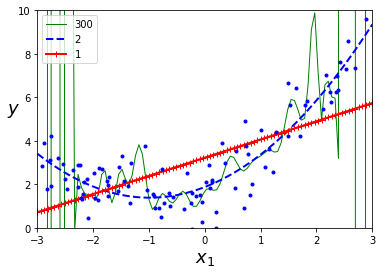

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

The 300-degree polynomial model gets as close as possible to the training data compared to quadratic model (2 degree) or Linear regression (1 degree).

### Ridge Regression or L<sub>2</sub> Regularization 

Here are some visual representations of the effects of different $\alpha$ values in Ridge Regression:

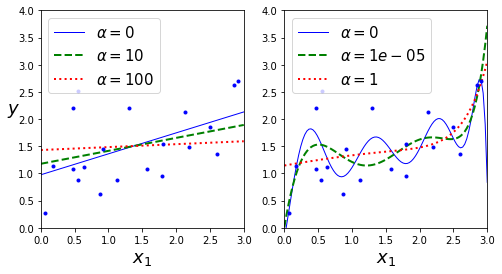

In [47]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42);

When $\alpha$ is 0 it is just a Linear Regression (left) or plain Polynomial Regression (right). Higher $\alpha$ values flattens the model predictions reducing the model's variance and increasing the bias.  

### Lasso Regression or L<sub>1</sub> Regularization 

Here are some visual representations of the effects of different $\alpha$ values in Lasso Regression:

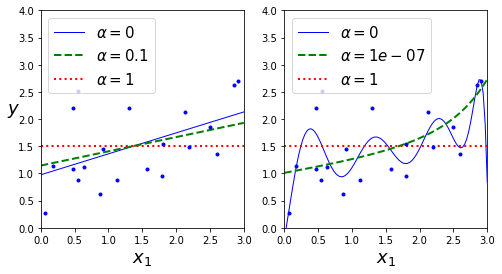

In [48]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42);

When $\alpha$ is 0 it is just a Linear Regression (left) or plain Polynomial Regression (right). Higher $\alpha$ values show that almost all weights for high-degree polynomial features are close to 0 ($\alpha$ looks quadratic in right panel).